# Fit to Distribution B

In [1]:
from math import sqrt
from matplotlib import pyplot as plot
from scipy.optimize import fminbound
from sympy import Symbol, log

from LocUtil import Grid1, LogGrid1, MinMax, SetSeed

from Dist import ExampB
from Map import LogRatio
from Mollifier import MolSetZ

In [2]:
nSamp = 100
nSinc = 8

givenSeed = 738

nPlot = 101

In [3]:
dist = ExampB()

## Pre-Fit Setup

### Generate Data

In [4]:
seed = SetSeed(givenSeed, digits=3)
if givenSeed is None:
	print(f'seed = {seed}')
samp = [dist.Sample() for _ in range(nSamp)]

In [5]:
sampSort = sorted(samp)
quant = [(k + 0.5) / nSamp for k in range(nSamp)]

Text(0, 0.5, 'CDF')

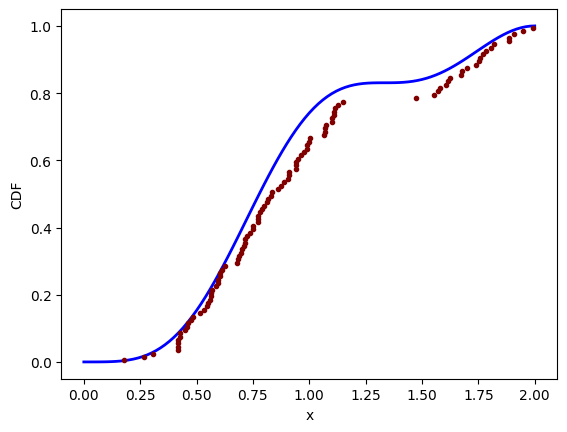

In [6]:
plot.plot(sampSort, quant, '.', c='Maroon')

xL = Grid1(0,2,nPlot)
cdfX = tuple(dist.Cdf(x) for x in xL)
plot.plot(xL, cdfX, c="blue", lw=2, zorder=-1)

plot.xlabel('x')
plot.ylabel('CDF')

### Map from x to z

In [7]:
x = Symbol('x')
z = Symbol('z')

map = LogRatio(x,z, (0,2))
mapExp = map.MapExp()
invExp = map.InvExp()

mapExp

log(x/(2 - x))

In [8]:
sampZ = [mapExp.subs(x,xV).evalf() for xV in sampSort]

In [9]:
zMin,zMax = MinMax(sampZ)
zMin,zMax

(-2.32603265160448, 5.39113567676777)

Text(0, 0.5, 'CDF')

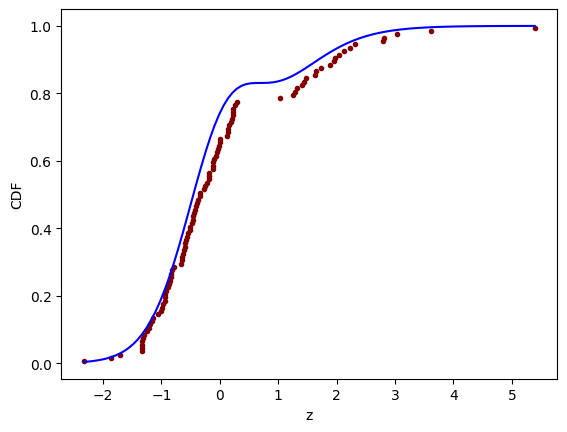

In [10]:
plot.plot(sampZ,quant, '.', c='Maroon')

zGrid = Grid1(zMin,zMax,nPlot)
cdfZ = [dist.Cdf(invExp.subs(z,zV).evalf()) for zV in zGrid]
plot.plot(zGrid,cdfZ, c='blue')

plot.xlabel('z')
plot.ylabel('CDF')

### Mollifyer

In [11]:
y = Symbol('y')
map = LogRatio(y, z, (0, 1))

In [12]:
mapMol = map.MapExp()
invMol = map.InvExp()

mapMol, invMol

(log(y/(1 - y)), exp(z)/(exp(z) + 1))

In [13]:
molZ = invMol

Text(0, 0.5, 'CDF')

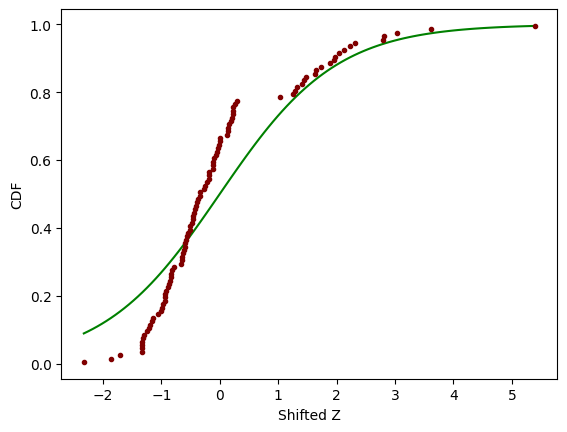

In [14]:
zGrid = Grid1(zMin,zMax, nPlot)
molL = [molZ.subs(z, zV) for zV in zGrid]
plot.plot(zGrid,molL, c='Green')

plot.plot(sampZ,quant, '.', c='Maroon')

plot.xlabel('Shifted Z')
plot.ylabel('CDF')

### Shift

In [15]:
z0 = (zMax + zMin) / 2
z0

1.53255151258164

In [16]:
zsMin = zMin - z0
zsMax = zMax - z0
zsMin,zsMax

(-3.85858416418612, 3.85858416418612)

In [17]:
sampZs = [z - z0 for z in sampZ]

Text(0, 0.5, 'CDF')

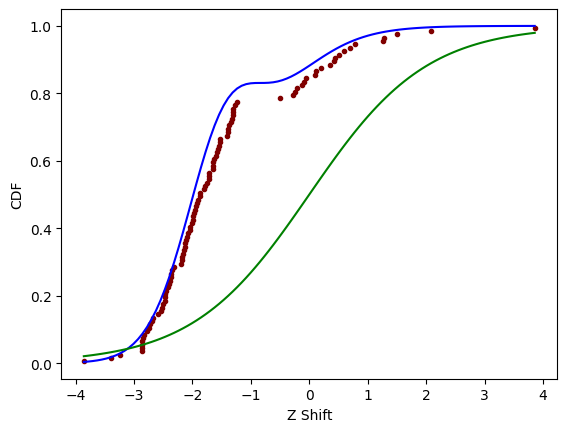

In [18]:
plot.plot(sampZs,quant, '.', c='Maroon')

zGrid = Grid1(zsMin, zsMax,nPlot)
cdfZs = [dist.Cdf(invExp.subs(z,zV + z0).evalf()) for zV in zGrid]
plot.plot(zGrid,cdfZs, c='blue')

molL = [molZ.subs(z, zV) for zV in zGrid]
plot.plot(zGrid,molL, c='Green')

plot.xlabel('Z Shift')
plot.ylabel('CDF')

### Scale

In [22]:
s = Symbol('s')

temp = molZ.subs(z, s*zsMin) - quant[0]
temp

-0.005 + exp(-3.85858416418612*s)/(1 + exp(-3.85858416418612*s))

In [23]:
temp.solve(s)

AttributeError: 'Add' object has no attribute 'solve'

In [52]:
(molZ.subs(z, s*zsMin) - quant[0]).solve()

AttributeError: 'Add' object has no attribute 'solve'

Need to figure out why this doesn't work sometimes but works other times'

In [25]:
scale = log(quant[0] / (1 - quant[0])) / zsMin
scale

1.37182567477856

In [48]:
molZsc = molZ.subs(z, scale*z)
molZsc

exp(1.37182567477856*z)/(exp(1.37182567477856*z) + 1)

Text(0, 0.5, 'CDF')

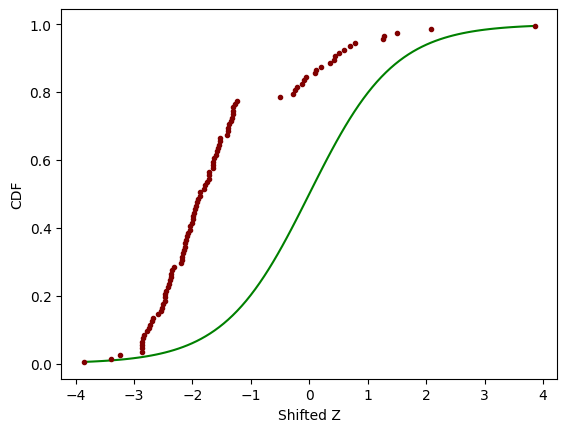

In [56]:
molL = [molZsc.subs(z, zV).evalf() for zV in zGrid]
plot.plot(zGrid,molL, c='Green')

plot.plot(sampZs,quant, '.', c='Maroon', label='Scaled Mollifyer')

plot.xlabel('Shifted Z')
plot.ylabel('CDF')

### Compute Residual

Text(0, 0.5, 'Residual')

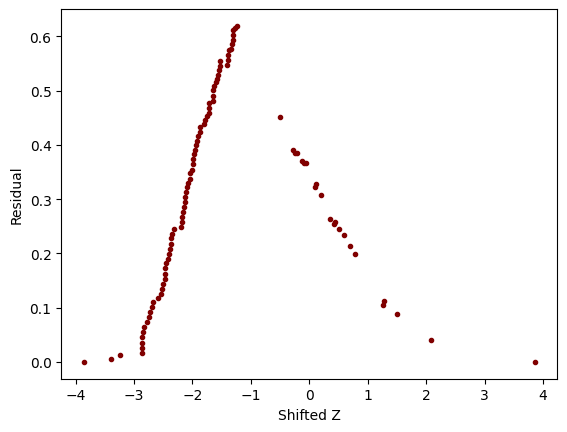

In [55]:
resZ = [q - molZsc.subs(z,zs).evalf() for (zs,q) in zip(sampZs,quant)]

plot.plot(sampZs,resZ, '.', c='Maroon')

plot.xlabel('Shifted Z')
plot.ylabel('Residual')

## Fit to Pre-Processed Data

In [ ]:
### Compute Floating Mollify Set

In [ ]:
MolSetZ(z, (0,1))

In [57]:
nSinc = 8

In [58]:
h = (zMax - zMin) / (nSinc - 1)
sincPointZ = tuple(zsMin + k*h for k in range(nSinc))